In [24]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


directory = 'dreamfiles/dream4qnrand_output_888'
colors = cm.rainbow(np.linspace(0, 1, 100))
data = []
for filename in os.listdir(directory):
    df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), filename])

[[0.0878913412334259, 0.0879926645188978, 0.0986539144130586, 0.1108490124472608, 0.1233236787082499, 0.1365873165273061, 0.1498412883983165, 0.1635292414319811, 0.178310512534718, 0.1960772748783761, 0.2128430450626223, 0.2310445461350633, 0.2485815359413943, 0.2670116283134671, 0.2870007853635055, 0.306391414753821, 0.3252366682751385, 0.3441991422831844, 0.3635704014902541, 0.3771131938598863, 0.3922043999415068, 0.4016250293672034, 0.4160924750879743, 0.4304986951806119, 0.4415171654517616, 0.4553794799830613, 0.4699863458524023, 0.4838439600631907, 0.4960751864022547, 0.5053034497077575, 0.5134111060527253, 0.521643321454455, 0.5310270016680336, 0.5407268253217545, 0.5501977968446335, 0.5584347124626761, 0.5647686953591065, 0.5671237833386299, 0.5695649653102656, 0.5719155318603673, 0.5742103640870264, 0.5764149923298775, 0.5785724139651541, 0.5807116519887167, 0.582760044327839, 0.5846869620244827, 0.5864747549927166, 0.5882416005003943, 0.5900414583352639, 0.5916964010037383, 0.

[[0.009090909090909, 0.0090877020170954, 0.008741851294037, 0.0083742776530751, 0.0080073622392968, 0.0076406730607066, 0.0072919637954038, 0.0077126483239059, 0.008092762729523, 0.0083681061595885, 0.0086701632997957, 0.0089425338313482, 0.0091586207223023, 0.0093360446940343, 0.0094257990780355, 0.009445008353544, 0.0093990027652121, 0.0095371849903582, 0.0097477516207264, 0.0108101547510016, 0.0117799791701123, 0.0127405683920626, 0.0153435672565541, 0.0210212939590613, 0.0267335031742355, 0.0320171874693797, 0.0362144970579706, 0.0405246479910133, 0.0468469782923161, 0.0530522419668949, 0.0588775715813035, 0.0648540075070668, 0.0703441100241836, 0.0754814684365984, 0.080540295308329, 0.0832724580640855, 0.0855458307316134, 0.0899289353817998, 0.0943510682973613, 0.0974035499534175, 0.0989936352426607, 0.1008802181976852, 0.1055786880649614, 0.1103143858407386, 0.116338424961001, 0.1203910339342364, 0.1234855827725969, 0.1263243631631014, 0.1293377160191621, 0.1326208019675263, 0.13

[[0.0138888888888888, 0.013910506486963, 0.0144317687372586, 0.0145180912081813, 0.0145914119276864, 0.015387986872627, 0.018598856597529, 0.0216102584350902, 0.0246069800403413, 0.0285587798500541, 0.0351972497853941, 0.0357091229729134, 0.036471259890888, 0.0372215561058838, 0.0379248753591588, 0.0385787393066817, 0.0392137451736885, 0.0397963925930591, 0.0538701450421994, 0.0590978339651511, 0.0628490032499785, 0.0650977211649236, 0.0688978874460443, 0.0726268038604208, 0.0758006550860036, 0.0781088336520271, 0.0804265745513984, 0.0829597007811976, 0.0847732981545948, 0.0852779430545367, 0.0858013620915033, 0.0871312389065425, 0.089861672908625, 0.0924939891926207, 0.0968105233915994, 0.1015137905634808, 0.1034881300399082, 0.1068241706042039, 0.108654083768066, 0.1081664999691945, 0.1082814415201792, 0.1083831284346204, 0.1085186015771979, 0.1086613100837498, 0.1089993427957005, 0.1098518665174334, 0.1104793823648123, 0.1192683147512828, 0.1336718693684578, 0.1435861364913557, 0.14

<Figure size 720x720 with 0 Axes>

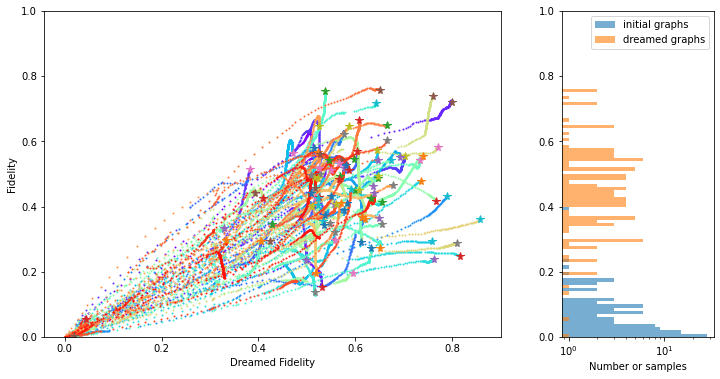

In [25]:
plt.figure(figsize=(10, 10))

#data = sorted(data, key=lambda x: x[0][0])
init = []
final = []
for ii, sample in enumerate(data):
    init.append(sample[0][0])
    final.append(sample[0][-1])
    

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6))
#plt.subplot(211)
for ii, sample in enumerate(data):
    #print(len(sample[1]))
    print(sample)
    c = colors[ii]
    a0.scatter(sample[1], sample[0], color=c, s=1)
    a0.plot([sample[1][-1]], [sample[0][-1]], marker='*', markersize=8)

a0.set_ylim([0, 1])
a0.set_xlabel('Dreamed Fidelity')
a0.set_ylabel('Fidelity')

#plt.subplot(212)
bins = np.arange(0, 1, 0.01)  # fixed bin size
a1.set_ylim([0, 1])
a1.set_xscale('log')
a1.set_xlabel('Number or samples')
a1.hist(init, bins=bins, alpha=0.6, orientation="horizontal",label='initial graphs')
a1.hist(final, bins=bins, alpha=0.6, orientation="horizontal",label='dreamed graphs')
a1.legend(prop={'size': 10})

24


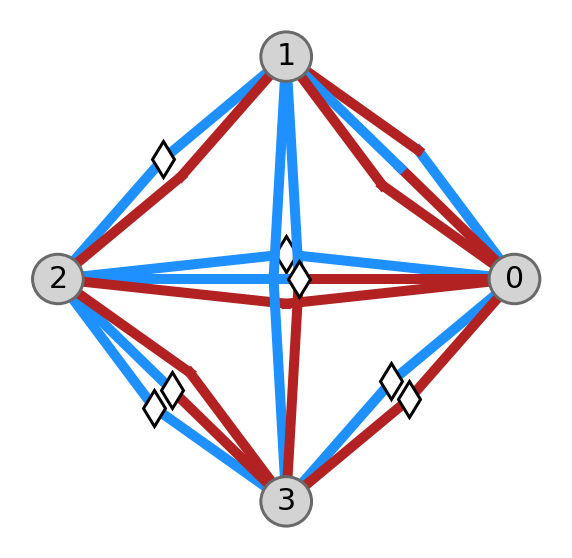

0.0
{((0, 0), (1, 1), (2, 0), (3, 0)): -0.3333333333333333,
 ((0, 0), (1, 1), (2, 0), (3, 1)): -0.3333333333333333,
 ((0, 0), (1, 1), (2, 1), (3, 1)): 0.3333333333333333,
 ((0, 1), (1, 0), (2, 0), (3, 0)): 0.0,
 ((0, 1), (1, 0), (2, 0), (3, 1)): -0.3333333333333333,
 ((0, 1), (1, 0), (2, 1), (3, 1)): 0.0,
 ((0, 1), (1, 1), (2, 0), (3, 0)): -0.3333333333333333,
 ((0, 1), (1, 1), (2, 0), (3, 1)): -0.3333333333333333,
 ((0, 1), (1, 1), (2, 1), (3, 1)): 0.0,
 ((0, 0), (1, 0), (2, 0), (3, 0)): 0.0,
 ((0, 0), (1, 0), (2, 0), (3, 1)): 0.3333333333333333,
 ((0, 1), (1, 0), (2, 1), (3, 0)): 0.3333333333333333,
 ((0, 0), (1, 1), (2, 1), (3, 0)): -0.3333333333333333}


In [74]:
DIM = [2] * 4
kets = hf.makeState('0000+1111')
state = fc.State(kets, normalize=True)

# This seems to reconstruct the graph that was observed to have the maximum actual fidelity


fids = [data[ii][0][-1] for ii in range(len(data))]
ind = np.argmax(fids)
filename = data[ind][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[0, 2])
edges = th.buildAllEdges(dimensions=4 * [2])
print(len(edges))
graph = fc.Graph(edges=edges, weights=weights)
graph.purge(threshold=7e-1, update=True)
graph = fc.Graph(graph.edges, weights=graph.weights)
gp.graphPlot(graph)
graph.getState()
dreamstate = graph.state
dreamstate.normalize()
print((state @ graph.state) ** 2)
print(graph.state)

In [73]:

weights = eval(df.iloc[-1, 2])
print(weights)


[0.8380889296531677, 0.039483558386564255, 0.41507214307785034, 0.013369989581406116, -1.7875888347625732, 0.07914812862873077, 0.3777773082256317, 0.524939775466919, -0.6932376027107239, 0.9368723034858704, 0.18536575138568878, -1.4808785915374756, -0.36774492263793945, -0.035613566637039185, 0.13654543459415436, 1.426884651184082, 1.8350327014923096, -0.20434631407260895, 0.19368505477905273, -0.3226623237133026, -1.1703734397888184, -0.774548351764679, -0.1032898798584938, 0.004872750956565142]


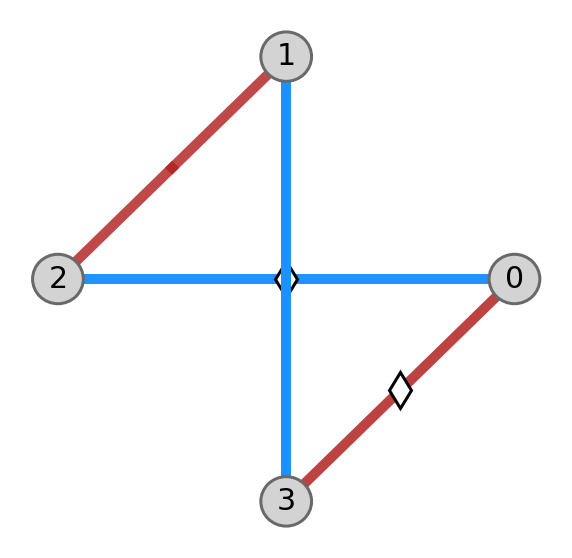

0.9552567308898267
{((0, 0), (1, 0), (2, 0), (3, 0)): -0.8406781269407081,
 ((0, 1), (1, 1), (2, 1), (3, 1)): -0.5415351206371226}


In [57]:
newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=7e-1, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)
print(newgraph.state)

In [55]:
np.max(fids)

0.7558209868147877

In [48]:
filename

'dream38_0.csv'

In [14]:
final

[0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017

In [97]:
dreamstate

{((0, 0), (1, 0), (2, 0), (3, 0)): 0.6090977429038597,
 ((0, 0), (1, 1), (2, 0), (3, 1)): 0.4994059570260126,
 ((0, 1), (1, 1), (2, 0), (3, 1)): 0.4652025868987332,
 ((0, 1), (1, 1), (2, 1), (3, 1)): 0.40395566937361144}

24


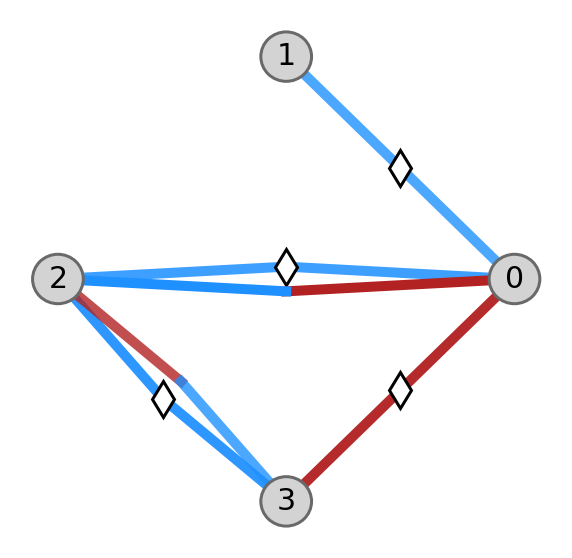

0.30035898178519604


In [95]:
# This seems to reconstruct the graph that was observed to have the maximum predicted fidelity

preds = [data[ii][1][-1] for ii in range(len(data))]
ind = np.argmax(preds)
filename = data[ind][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[-1, 2])
edges = th.buildAllEdges(dimensions=4 * [2])
print(len(edges))
graph = fc.Graph(edges=edges, weights=weights)

newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=7e-1, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)